In [ ]:
# Getting data

**Install required packages**

In [2]:
!pip install -q webhoseio
!pip install -q sklearn
!pip install -q os
print("Done")

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Done


  Could not find a version that satisfies the requirement os (from versions: )
No matching distribution found for os
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


**Import required packages**

In [1]:
import re
import webhoseio
import json
import time
import numpy as np
from os import listdir
print("Done")

Done


**Define global variables**

In [21]:
articles = []
types = list()
words = list()
#NLTK´S stopwords + mine
stopWords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours","ers", "yourself", "yourselves", "he","isnt","cant" "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "wasnt", "were", "be", "been", "being", "have", "havent", "has", "had", "having", "do", "does", "doesnt", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

trainingPercentage = 80
amountOfArticlesLoad = 8000

class Regs: 
    specialChars = '' 
    digits = '' 
    singleChars = ''
    multipleWhiteSpaces = ''
    stopWords = list()
regexes = Regs()
regexes.specialChars = re.compile('[^\w\s]')
regexes.digits = re.compile('\d')
regexes.singleChars = re.compile('\s.\s')
regexes.multipleWhiteSpaces = re.compile('[ ]{2,}')
for sw in stopWords:
    exp = '\\b' + sw + '+\W'
    regexes.stopWords.append(re.compile(exp))
    
def preprocessText(text):
    text = text.lower()
    #new lines
    text = text.replace('\n', ' ')
    #special characters
    text = re.sub(regexes.specialChars, '', text)
    #digits
    text = re.sub(regexes.digits, '', text)
    #stopwords
    for sw in regexes.stopWords:
        text = re.sub(sw , '', text)
    #single characters (ex donald j trump => donald trump)
    text = re.sub(regexes.singleChars, ' ', text)
    #multiple white spaces
    text = re.sub(regexes.multipleWhiteSpaces, ' ', text)
    return(text)
print("fucntion preprocessText done")

print("Done")

Done


**Processing data**


1.   Get data from files 

2.   Iterate trough the texts and preprocess them

3.   Create the dictionary from all texts and then remove duplicates

4.   Create the matrix which will contain 0/1 showing if the word is in the text. First column represents the label, all other columns represents the words in dictionary



##### #load data for sports


In [17]:
sportArticles = listdir('DATA/Sports')
if len(sportArticles) > 0 :
    print("Preprocessing of " + str(amountOfArticlesLoad*trainingPercentage / 100) + " sports articles starting")
    start = time.time()
    for index, article in enumerate(sportArticles, start=0):
        if index < (amountOfArticlesLoad*trainingPercentage / 100) :
            with open("DATA/Sports/" + article, encoding="utf8") as json_data:
                text = json.load(json_data)["text"]
                text = preprocessText(text)
                articles.append(text.split(' '))
                types.append("1")     
    end = time.time()
    print("Preprocessing sports data finished in ",end - start)
#load data for business
financeArticles = listdir("DATA/Finance")
if len(financeArticles) > 0 :
    print("Preprocessing of " + str(amountOfArticlesLoad*trainingPercentage / 100) + " business articles starting")
    start = time.time()
    for index, article in enumerate(financeArticles, start=0):
        if index < (amountOfArticlesLoad*trainingPercentage / 100) :
            with open("DATA/Finance/" + article, encoding="utf8") as json_data:
                text = json.load(json_data)["text"]
                text = preprocessText(text)
                articles.append(text.split(' '))
                types.append("0")    
               
    end = time.time()
    print("Preprocessing finished in ",end - start)
start = time.time()
#create one array fromm all articles
words = [item for sublist in articles for item in sublist]
#remove duplicate values from words list
words = list(set(words))
words.remove("")
words = sorted(words)
wordsDictionary = dict((v, i) for i, v in enumerate(words))
end = time.time()
print("Creating dictionary finished in ",end - start)
print("There are " + str(len(words)) + " words")

print("Creating matrix of containing words")
start = time.time()
articleWords = np.zeros((len(articles), len(words) + 1))
for index, article in enumerate(articles, start=0):
    articleWords[index, 0 ] = types[index] 
    for j, word in enumerate(article, start=0):
        if word != '':
            articleWords[index, wordsDictionary[word] + 1] = 1        


end = time.time()
print("Creating matrix finished in ",end - start)
    
print("Done")


Preprocessing of 160.0 sports articles starting
Preprocessing sports data finished in  1.1472365856170654
Preprocessing of 160.0 business articles starting
Preprocessing finished in  1.8038532733917236
Creating dictionary finished in  0.02583599090576172
There are 12111 words
Creating matrix of containing words
Creating matrix finished in  0.04837465286254883
Done


**Creating the matrix containg the probabilities**

Starting creation of matrix
Creating the matrix containg the probabilities finished in  0.3643651008605957
Done


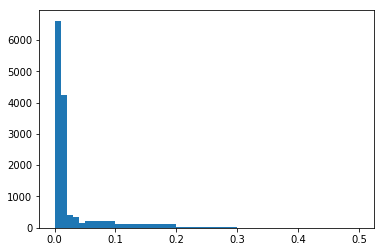

In [23]:
print("Starting creation of matrix")
start = time.time()
X = articleWords
#calculate the phi values
Y = np.zeros((2, X.shape[1]))
#number of rows (number of samples in training set)
m = X.shape[0]

#number of words
n = X.shape[1] - 1

#number of rows clasified to first / second group
sumY1 = float(np.sum(X[:,0]))
sumY0 = float(m - np.sum(X[:,0]))

#calcualting Phi_{y=0} and Phi_{y=1}
Y[0,0] = (sumY0 + 1) / float(m + 2)
Y[1,0] = (sumY1 + 1) / float(m + 2)

for j in range(1, X.shape[1]):
    #calcualting Phi_{j|y=0} and Phi_{j|y=1}
    Y[0,j] = (np.sum(X[X[:,0]==1,j]) + 1) / (sumY0 + 2)
    Y[1,j] = (np.sum(X[X[:,0]==0,j]) + 1) / (sumY1 + 2)
      
end = time.time()
print("Creating the matrix containg the probabilities finished in ",end - start)
print("Done")


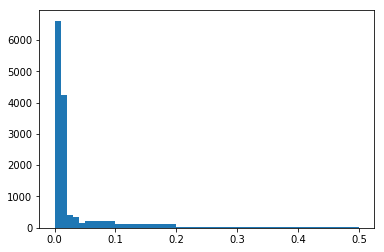

In [27]:
import matplotlib.pyplot as plt

plt.hist(Y[0,1:], bins=[0,0.0001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.5])

plt.show()

**Test the algoritm on sports test articles**

In [19]:
print("Startin the test on finance data")
businessSucces = 0
for index, article in enumerate(financeArticles, start=0):
    if index >= (amountOfArticlesLoad*trainingPercentage / 100 ) and index <= amountOfArticlesLoad:
        with open("DATA/Finance/" + article, encoding="utf8") as json_data:
            print(index)
            testtext = json.load(json_data)["text"]
            testtext = preprocessText(testtext)
            testarticle = testtext.split(' ')
            testArticleWords = np.zeros((1, len(words)))
            for k, word in enumerate(testarticle, start=0):
                if word != '' :
                    if word in words:
                        testArticleWords[0, words.index(word)] = 1

            a = np.log(Y[1,0])
            b = np.log(Y[0,0])

            #get probability that this vector is classified to first gorup y=0
            for j in range(1, X.shape[1]):
                if(testArticleWords[0,j - 1] == 0):
                    a = a + np.log((1 - Y[1,j]))
                    b = b + np.log((1 - Y[0,j]))
                else:
                    a = a + np.log(Y[1,j])
                    b = b + np.log(Y[0,j])

            phi0z = 1 / ( 1 + np.exp(a - b))
            phi1z = 1 / ( 1 + np.exp(b - a))

            if(phi0z > 0.5):
                businessSucces = businessSucces + 1

            #print("Text belongs to group 0:")
            #print(phi0z)

            #print("Text belongs to group 1:")
            #print(phi1z)
print("businessucces")
print(businessSucces)
print(businessSucces / (amountOfArticlesLoad*(100 - trainingPercentage) / 100) * 100)

Startin the test on finance data
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
businessucces
10
25.0


In [41]:
testtext = businessData["posts"][89]["text"]
testtext = preprocessText(testtext)
testarticle = testtext.split(' ')
testArticleWords = np.zeros((1, len(words)))
for k, word in enumerate(testarticle, start=0):
    if word != '' :
        if word in words:
            testArticleWords[0, words.index(word)] = 1

a = np.log(Y[1,0])
b = np.log(Y[0,0])

#get probability that this vector is classified to first gorup y=0
for j in range(1, X.shape[1]):
    if(testArticleWords[0,j - 1] == 0):
        a = a + np.log((1 - Y[1,j]))
        b = b + np.log((1 - Y[0,j]))
    else:
        a = a + np.log(Y[1,j])
        b = b + np.log(Y[0,j])

phi0z = 1 / ( 1 + np.exp(a - b))
phi1z = 1 / ( 1 + np.exp(b - a))


print("Text belongs to group 0:")
print(phi0z)

print("Text belongs to group 1:")
print(phi1z)

Text belongs to group 0:
0.5833312342487992
Text belongs to group 1:
0.4166687657512009


**SKLEARN - reproduce our algorithm**

In [60]:
print(testArticleWords.shape)
print(X.shape)
print(Y.shape)

print(YY)

(1, 11427)
(170, 11428)
(2, 11428)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [20]:
print("Startin the test on finance data")
XX = articleWords[:,1:]
YY = articleWords[:,0]
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(XX, YY)
businessSucces = 0
for index, article in enumerate(financeArticles, start=0):
    if index >= (amountOfArticlesLoad*trainingPercentage / 100 ) and index <= amountOfArticlesLoad:
        with open("DATA/Finance/" + article, encoding="utf8") as json_data:
            print(index)
            testtext = json.load(json_data)["text"]
            testtext = preprocessText(testtext)
            testarticle = testtext.split(' ')
            testArticleWords = np.zeros((1, len(words)))
            for k, word in enumerate(testarticle, start=0):
                if word != '' :
                    if word in words:
                        testArticleWords[0, words.index(word)] = 1

            businessSucces = businessSucces + clf.predict(testArticleWords)
        
print("businessucces")
print(businessSucces)
print(businessSucces / (amountOfArticlesLoad*(100 - trainingPercentage) / 100) * 100)

Startin the test on finance data
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
businessucces
[10.]
[25.]
